In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#loading the csv file to data frame
customer_data = pd.read_csv("Mall_Customers.csv")

In [3]:
#First 5 rows in the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some informations about the dataset
customer_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
customer_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\Katam Veera Kowshik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


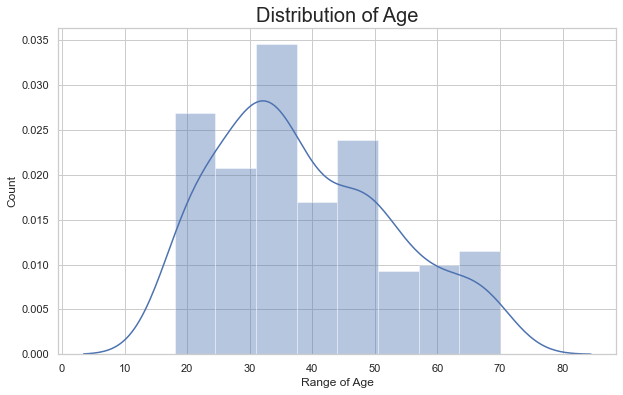

In [9]:
#Distribution of age

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count');

C:\Users\Katam Veera Kowshik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

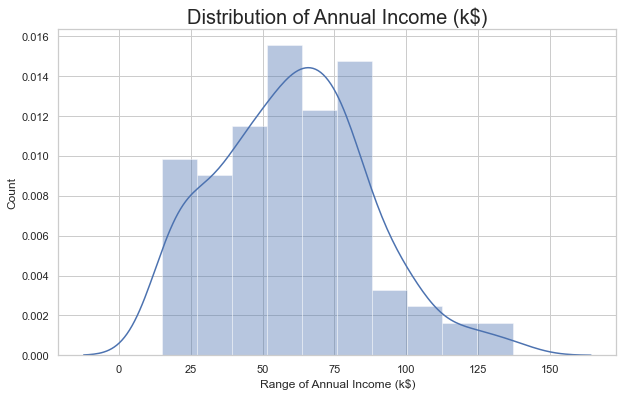

In [10]:
#Distribution of Annnual Income

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\Katam Veera Kowshik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

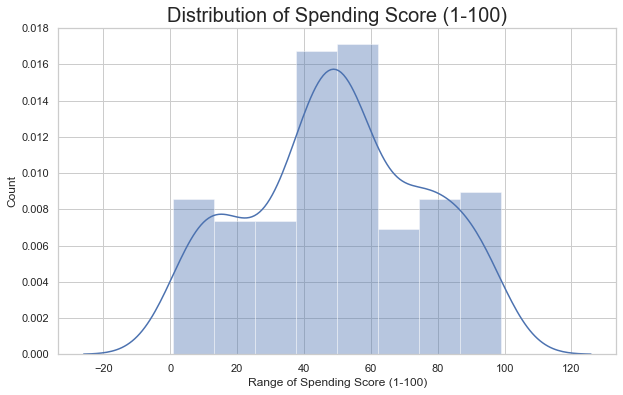

In [11]:
#Distribution of spending score

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer_data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

# Gender Analysis

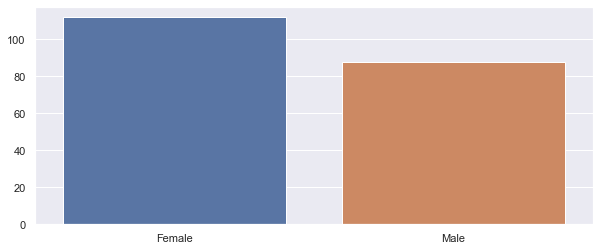

In [12]:

genders = customer_data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

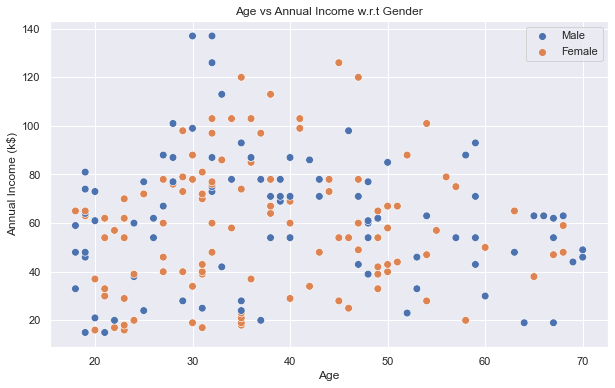

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , hue="Gender",data = customer_data  ,s = 60 )
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

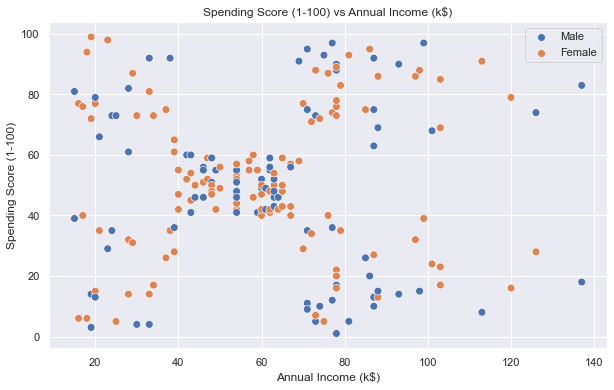

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)'  , hue="Gender",data = customer_data ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.legend()
plt.show()

# Age Buckets

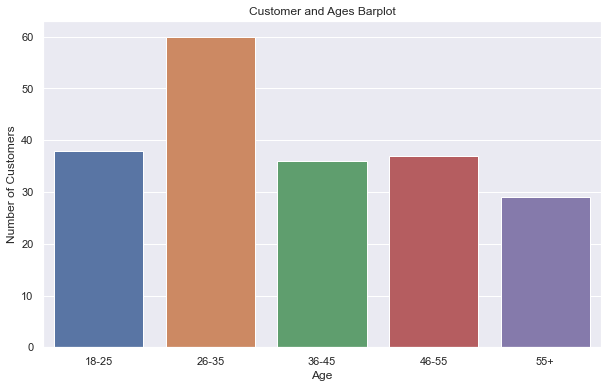

In [15]:
age18_25 = customer_data.Age[(customer_data.Age <= 25) & (customer_data.Age >= 18)]
age26_35 = customer_data.Age[(customer_data.Age <= 35) & (customer_data.Age >= 26)]
age36_45 = customer_data.Age[(customer_data.Age <= 45) & (customer_data.Age >= 36)]
age46_55 = customer_data.Age[(customer_data.Age <= 55) & (customer_data.Age >= 46)]
age55above = customer_data.Age[customer_data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

In [16]:
data = customer_data

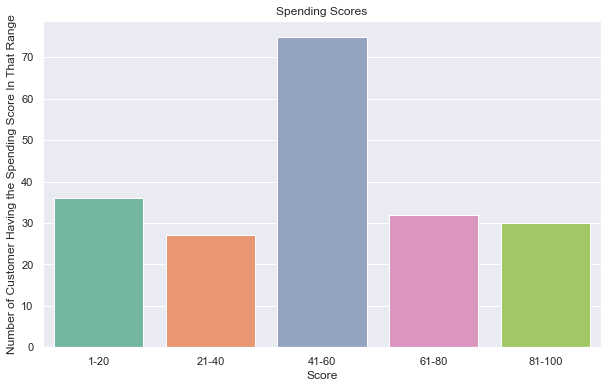

In [17]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Spending Score In That Range")
plt.show()

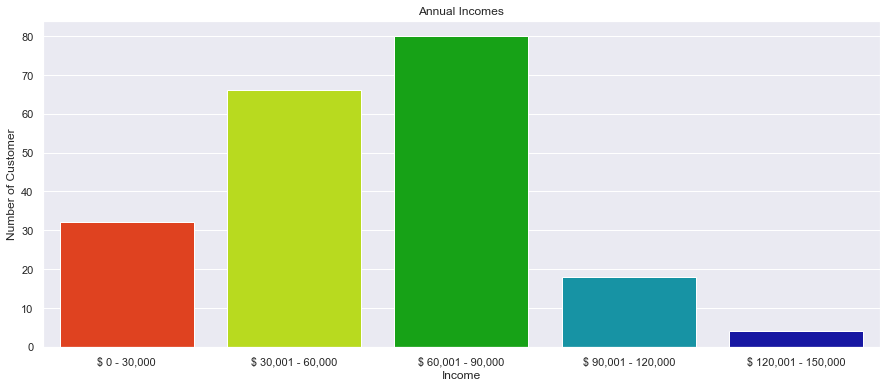

In [18]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# Doing the Kmeans Clustering with 3 input features

In [19]:
X  = customer_data[["Annual Income (k$)","Spending Score (1-100)"]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [20]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\Katam Veera Kowshik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


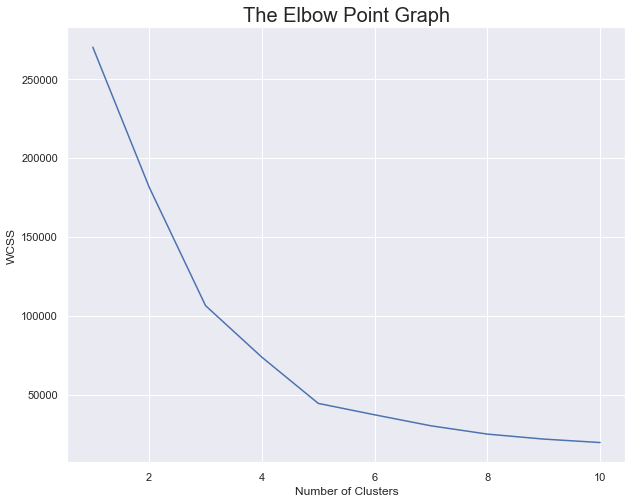

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show();

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [23]:
data["label"] = Y

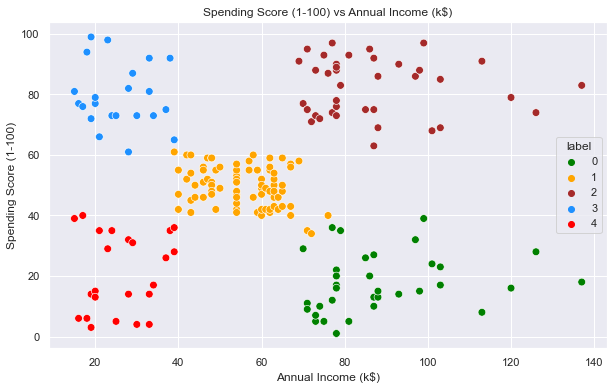

In [24]:
# plotting all the clusters and their Centroids

#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

#    Doing the Kmeans Clustering with 3 input features

In [25]:
X2=customer_data[["Age","Annual Income (k$)","Spending Score (1-100)"]]
df2=customer_data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X2)

  wcss.append(kmeans.inertia_)

C:\Users\Katam Veera Kowshik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


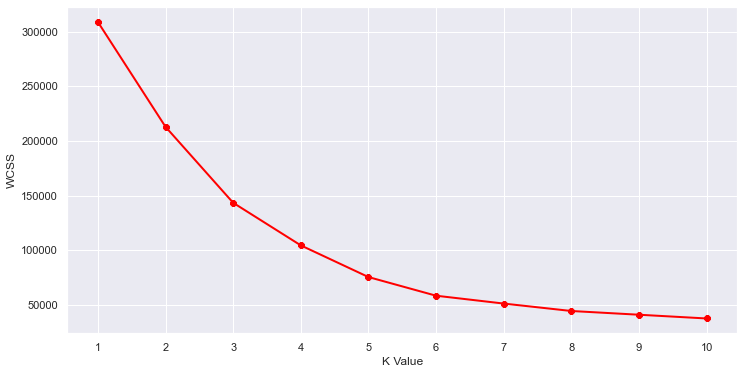

In [27]:
plt.figure(figsize=(12,6))    

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [28]:
#We choose the k for which WSS starts to diminish

km2 = KMeans(n_clusters=5)
y2 = kmeans.fit_predict(X2)
df2["label"] = y2

In [29]:
#The new data

df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,8
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,8


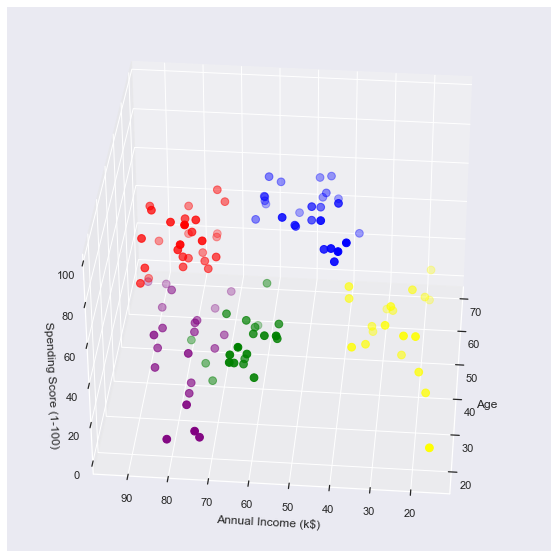

In [30]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()